## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Table of contents

# Business Understanding
# Data Understanding
# Data Preparation
# Modeling
# Regression Results

## 1. Business Understanding

### Business Problem

* content here

## 2. Data Understanding

### Exploratory Data Analysis

In [2]:
# Datasets: KC House dataset
!ls data/

column_names.md  kc_house_data.csv


In [3]:
# Inspect content for the columns
!cat data/column_names.md

# Column Names and Descriptions for King County Data Set
* `id` - Unique identifier for a house
* `date` - Date house was sold
* `price` - Sale price (prediction target)
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Square footage of living space in the home
* `sqft_lot` - Square footage of the lot
* `floors` - Number of floors (levels) in house
* `waterfront` - Whether the house is on a waterfront
  * Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts
* `view` - Quality of view from house
  * Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other
* `condition` - How good the overall condition of the house is. Related to maintenance of house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type

In [4]:
# Import packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

In [5]:
# Load the dataset
kc_house_data = pd.read_csv('./data/kc_house_data.csv', encoding='utf8')
kc_house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [6]:
# Check last 5 values
kc_house_data.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,NO,NONE,...,7 Average,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


In [7]:
# Check a random sample of the data
kc_house_data.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
19032,4027700466,12/19/2014,340500.0,3,1.00,1770,12458,1.0,NO,NONE,...,7 Average,1770,0.0,1957,0.0,98155,47.7715,-122.270,2000,8225
15835,3295450050,1/9/2015,322000.0,4,2.50,1950,4553,2.0,NO,NONE,...,7 Average,1950,0.0,2000,0.0,98056,47.5066,-122.175,1780,4598
7603,1250201194,11/7/2014,449000.0,3,1.75,1270,6600,1.5,NO,NONE,...,7 Average,1270,0.0,1903,0.0,98144,47.5976,-122.295,1490,3600
17445,3625700010,5/6/2014,1870000.0,5,4.00,4510,15175,2.0,NO,NONE,...,10 Very Good,4510,0.0,1969,2002.0,98040,47.5309,-122.228,3510,13500
13217,2770604104,6/4/2014,499950.0,3,2.50,1520,2208,2.0,NaN,NONE,...,8 Good,1040,480.0,2007,0.0,98119,47.6419,-122.374,1610,1618
7363,8642600170,10/9/2014,375000.0,4,2.00,1757,19370,1.0,NO,AVERAGE,...,7 Average,1757,0.0,1955,0.0,98198,47.3974,-122.312,1850,11125
17883,4054500180,7/24/2014,985000.0,4,3.25,4030,36762,2.0,NaN,NONE,...,11 Excellent,4030,0.0,1988,NaN,98077,47.7235,-122.039,4090,40371
9824,1446801000,3/20/2015,352000.0,5,2.50,2900,6650,1.0,NO,NONE,...,7 Average,1450,1450.0,1964,0.0,98168,47.4935,-122.332,1600,8246
473,8651610890,10/14/2014,1150000.0,4,3.25,4190,10259,2.0,NO,NONE,...,11 Excellent,3150,1040.0,2000,0.0,98074,47.6332,-122.066,4300,11919
16339,1450000050,5/1/2015,201000.0,3,1.00,900,7576,1.0,NO,NONE,...,6 Low Average,900,0.0,1959,0.0,98002,47.2881,-122.220,1220,7452


In [8]:
# Check data types and column information
kc_house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

### Investigate unique values in each column
Let's investigate unique values in the columns to find any uncaught null values or incorrect data types

In [9]:
# Date column
kc_house_data['date'].value_counts()

6/23/2014     142
6/25/2014     131
6/26/2014     131
7/8/2014      127
4/27/2015     126
             ... 
11/30/2014      1
8/30/2014       1
2/15/2015       1
1/31/2015       1
1/10/2015       1
Name: date, Length: 372, dtype: int64

In [10]:
# Price column
kc_house_data['price'].value_counts()

350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
870515.0      1
336950.0      1
386100.0      1
176250.0      1
884744.0      1
Name: price, Length: 3622, dtype: int64

In [11]:
# Bedrooms column
kc_house_data['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [12]:
# Bathrooms column
kc_house_data['bathrooms'].value_counts()

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [13]:
# Sqft_living column
kc_house_data['sqft_living'].value_counts()

1300    138
1400    135
1440    133
1660    129
1010    129
       ... 
4970      1
2905      1
2793      1
4810      1
1975      1
Name: sqft_living, Length: 1034, dtype: int64

In [14]:
# Sqft_lot column
kc_house_data['sqft_lot'].value_counts()

5000      358
6000      290
4000      251
7200      220
7500      119
         ... 
1448        1
38884       1
17313       1
35752       1
315374      1
Name: sqft_lot, Length: 9776, dtype: int64

In [15]:
# Floors column
kc_house_data['floors'].value_counts()

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

In [16]:
# Waterfront column
kc_house_data['waterfront'].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

In [17]:
# View column
kc_house_data['view'].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [18]:
# condition column
kc_house_data['condition'].value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

In [19]:
# Grade column
kc_house_data['grade'].value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

In [20]:
# Sqft_above column
kc_house_data['sqft_above'].value_counts()

1300    212
1010    210
1200    206
1220    192
1140    184
       ... 
2601      1
440       1
2473      1
2441      1
1975      1
Name: sqft_above, Length: 942, dtype: int64

In [21]:
# Sqft_basement column
kc_house_data['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
172.0         1
1024.0        1
266.0         1
1245.0        1
588.0         1
Name: sqft_basement, Length: 304, dtype: int64

There is a **?** on **454** records in sqft_basement meaning they are null values. The datatype of the column values is object thus needs to be converted to float measurements after replacing the null values

In [22]:
# Sqft_living column
kc_house_data['yr_built'].value_counts()

2014    559
2006    453
2005    450
2004    433
2003    420
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

In [23]:
# Yr_renovated column
kc_house_data['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [24]:
# Zipcode column
kc_house_data['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [25]:
# Latitude column
kc_house_data['lat'].value_counts()

47.6846    17
47.5322    17
47.6624    17
47.5491    17
47.6886    16
           ..
47.3104     1
47.4681     1
47.2819     1
47.6096     1
47.4300     1
Name: lat, Length: 5033, dtype: int64

In [26]:
# Longitude column
kc_house_data['long'].value_counts()

-122.290    115
-122.300    111
-122.362    104
-122.291    100
-122.372     99
           ... 
-121.803      1
-121.711      1
-122.454      1
-121.835      1
-121.849      1
Name: long, Length: 751, dtype: int64

In [27]:
# sqft_living15 column
kc_house_data['sqft_living15'].value_counts()

1540    197
1440    195
1560    192
1500    180
1460    169
       ... 
4890      1
2873      1
952       1
3193      1
2049      1
Name: sqft_living15, Length: 777, dtype: int64

In [28]:
# sqft_lot15 column
kc_house_data['sqft_lot15'].value_counts()

5000      427
4000      356
6000      288
7200      210
4800      145
         ... 
11036       1
8989        1
871200      1
809         1
6147        1
Name: sqft_lot15, Length: 8682, dtype: int64

## 3. Data Preparation

### Data Cleaning

In order to carry out further investigation, we need to convert the **?** in sqft_basement to an empty value then correct the data type.

In [29]:
# Find and count null entries
kc_house_data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [30]:
# Function to get percentage of null values in each column
def getNullValues(dataFrame):
    """Calculates the percentage of data that is missing in each column"""
    percentage_of_null_values = 0
    for col in dataFrame.columns:
        percentage_of_null_values = dataFrame[col].isna().sum() / dataFrame.shape[0] * 100
        print(f"{round(percentage_of_null_values, 2)}% - {col}")
getNullValues(kc_house_data)

0.0% - id
0.0% - date
0.0% - price
0.0% - bedrooms
0.0% - bathrooms
0.0% - sqft_living
0.0% - sqft_lot
0.0% - floors
11.0% - waterfront
0.29% - view
0.0% - condition
0.0% - grade
0.0% - sqft_above
0.0% - sqft_basement
0.0% - yr_built
17.79% - yr_renovated
0.0% - zipcode
0.0% - lat
0.0% - long
0.0% - sqft_living15
0.0% - sqft_lot15


#### a. Square footage of basement

In [31]:
# Replace ? with nan
kc_house_data['sqft_basement'].replace(to_replace=['?'], value=[np.nan], inplace=True)
kc_house_data['sqft_basement'].isna().sum()

454

In [33]:
?pd.Series.apply

In [35]:
# Fill null values in sqft_basement with 0 and convert the column to int datatype
kc_house_data['sqft_basement'].fillna(0, inplace=True)
kc_house_data['sqft_basement'] = kc_house_data['sqft_basement'].apply(lambda value: float(value))
kc_house_data['sqft_basement'].isna().sum()

0

#### b. Year renovated

In [36]:
kc_house_data['yr_renovated'].isna().sum()

3842

In [37]:
# Fill the null values in the dataset using 0. The assumption is the houses were not renovated
kc_house_data['yr_renovated'].fillna(value=0, inplace=True)
kc_house_data['yr_renovated'].isna().sum()

0

#### c. View

In [38]:
kc_house_data['view'].isna().sum()

63

In [39]:
# Fill the null values in the view column with the mode value (NONE)
kc_house_data['view'].fillna(kc_house_data['view'].mode()[0], inplace=True)

In [40]:
kc_house_data['view'].isna().sum()

0

In [41]:
kc_house_data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

#### d.Waterfront

In [43]:
# Fill null values in the waterfront column with the mode of the column data
mode_value = kc_house_data['waterfront'].mode()[0]
kc_house_data['waterfront'].fillna(mode_value, inplace=True)
kc_house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  object 
 9   view           21597 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [44]:
# Get descriptive statistics (mean, min-max, std etc.)
kc_house_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,285.716581,1970.999676,68.758207,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,439.819830,29.375234,364.037499,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,550.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [45]:
kc_house_data.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.010799,-0.004359,0.021617,-0.010612,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.605368,0.321108,0.053953,0.117855,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,0.479386,0.297229,0.155670,0.017900,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.686668,0.278485,0.507173,0.047177,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.876448,0.428660,0.318152,0.051060,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.184139,0.015031,0.052946,0.004979,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.523989,-0.241866,0.489193,0.003793,-0.059541,0.049239,0.125943,0.280102,-0.010722
sqft_above,-0.010799,0.605368,0.479386,0.686668,0.876448,0.184139,0.523989,1.000000,-0.051175,0.424037,0.020645,-0.261570,-0.001199,0.344842,0.731767,0.195077
sqft_basement,-0.004359,0.321108,0.297229,0.278485,0.428660,0.015031,-0.241866,-0.051175,1.000000,-0.130085,0.065008,0.073271,0.109853,-0.142369,0.199288,0.015885
yr_built,0.021617,0.053953,0.155670,0.507173,0.318152,0.052946,0.489193,0.424037,-0.130085,1.000000,-0.202555,-0.347210,-0.148370,0.409993,0.326377,0.070777


<AxesSubplot:>

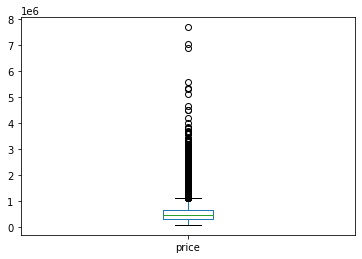

In [46]:
kc_house_data['price'].plot(kind='box')

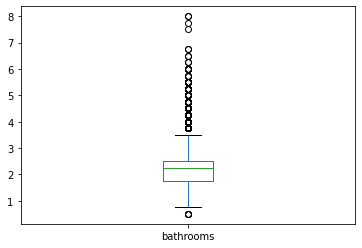

In [47]:
kc_house_data['bathrooms'].plot(kind='box');

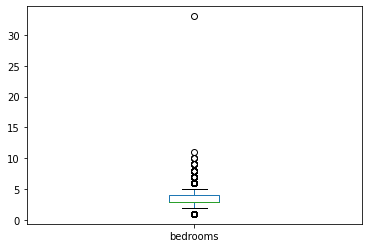

In [48]:
kc_house_data['bedrooms'].plot(kind='box');

In [49]:
kc_house_data.price.describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

The minimum price for a house is **\$78,000** and the maximum is **\$7,700,000**. The mean price of a house is **\$540,296.6** with a standard deviation of **\$367,368.1**

In [50]:
kc_house_data['bathrooms'].value_counts()

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [51]:
kc_house_data['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [52]:
kc_house_data.loc[kc_house_data['bedrooms'] == 33, :]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,NO,NONE,...,7 Average,1040,580,1947,0.0,98103,47.6878,-122.331,1330,4700


In [53]:
kc_house_data['grade'].value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

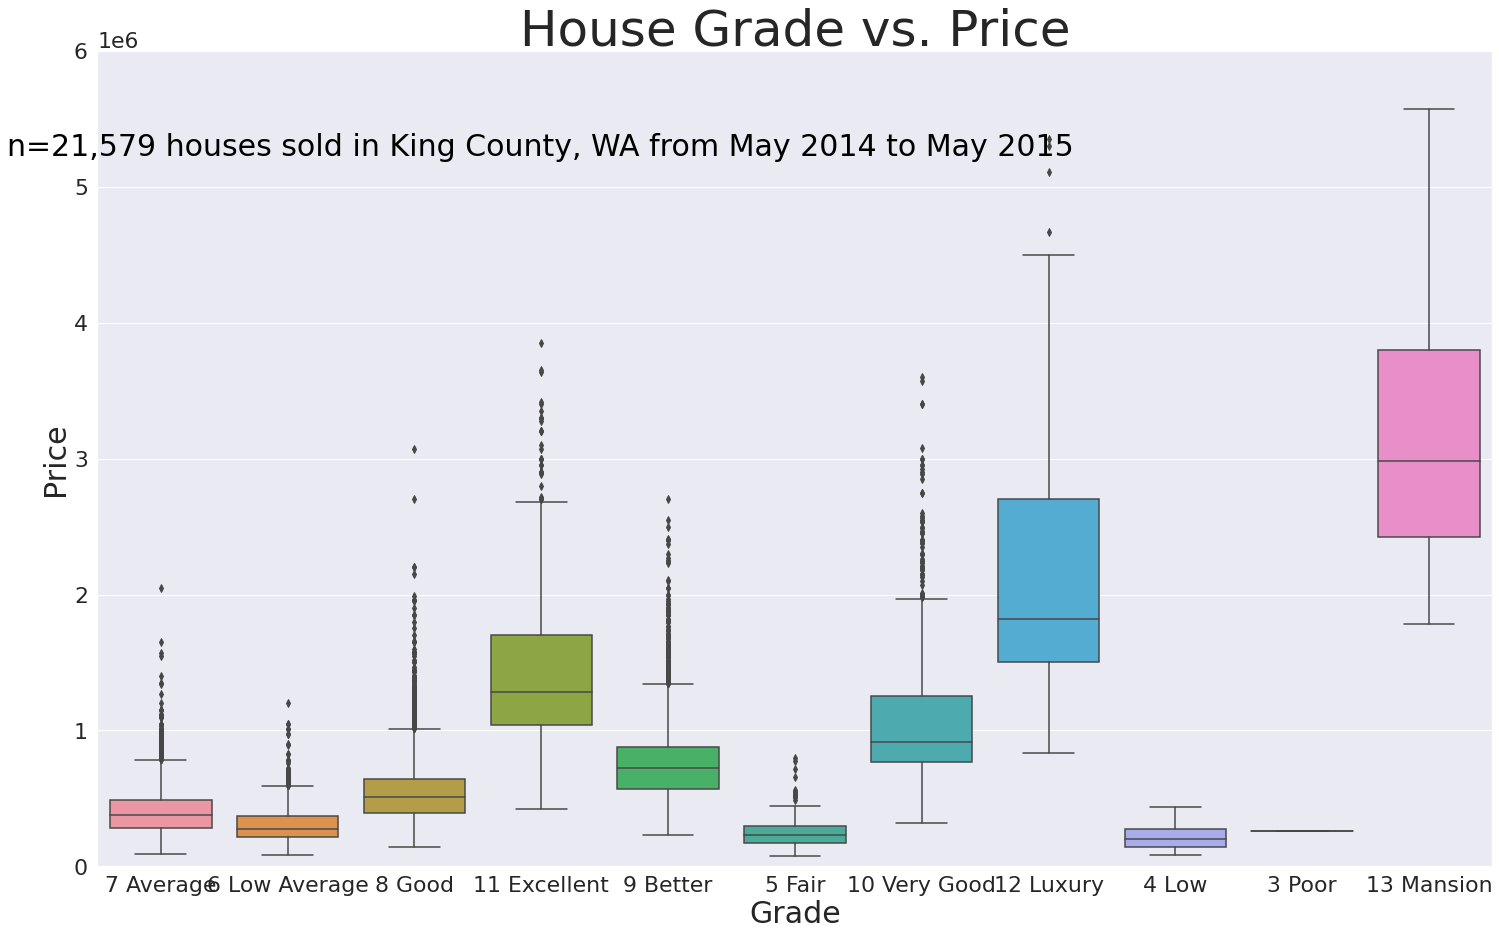

In [54]:
plt.figure(figsize=(25,15))
sns.set(font_scale=2)
pal = sns.color_palette("husl", 8)
ax = sns.boxplot(x="grade", y="price", data=kc_house_data)
ax.set_title('House Grade vs. Price', fontsize=50)
ax.set_ylabel('Price', fontsize=30)
ax.set_xlabel('Grade', fontsize=30)
ax.set_ylim(bottom=0, top=6000000)
ax.text(.7, .9, 'n=21,579 houses sold in King County, WA from May 2014 to May 2015',
        color='black', fontsize=30,
        horizontalalignment='right',
        verticalalignment='top',
        transform=ax.transAxes);
# plt.savefig('./visualizations/grade.png')

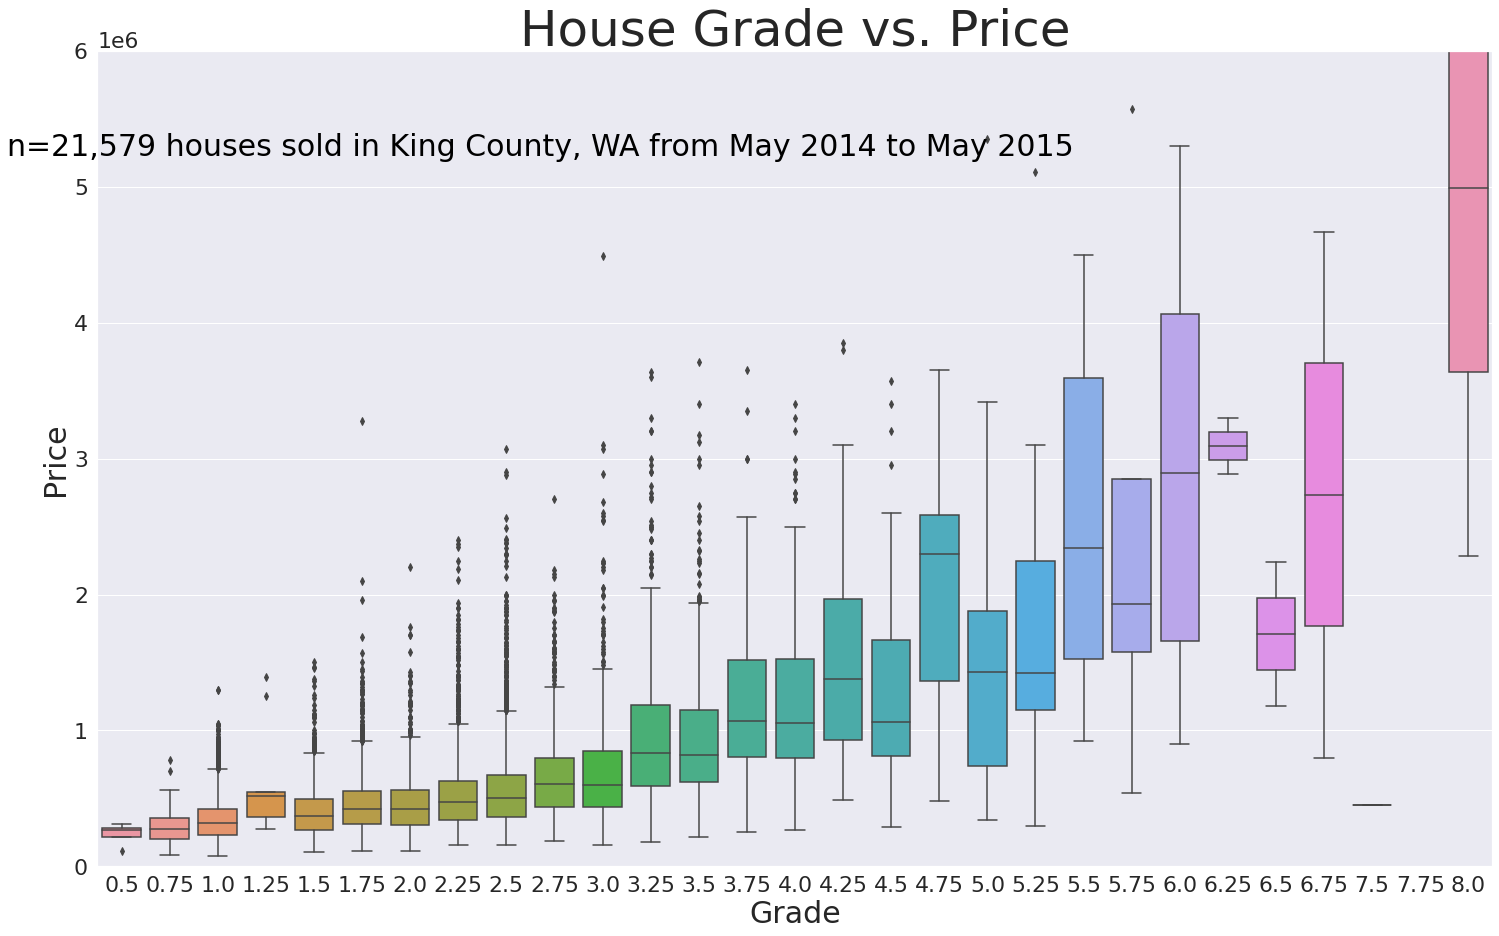

In [55]:
plt.figure(figsize=(25,15))
sns.set(font_scale=2)
pal = sns.color_palette("husl", 8)
ax = sns.boxplot(x="bathrooms", y="price", data=kc_house_data)
ax.set_title('House Grade vs. Price', fontsize=50)
ax.set_ylabel('Price', fontsize=30)
ax.set_xlabel('Grade', fontsize=30)
ax.set_ylim(bottom=0, top=6000000)
ax.text(.7, .9, 'n=21,579 houses sold in King County, WA from May 2014 to May 2015',
        color='black', fontsize=30,
        horizontalalignment='right',
        verticalalignment='top',
        transform=ax.transAxes);
# plt.savefig('./visualizations/grade.png')

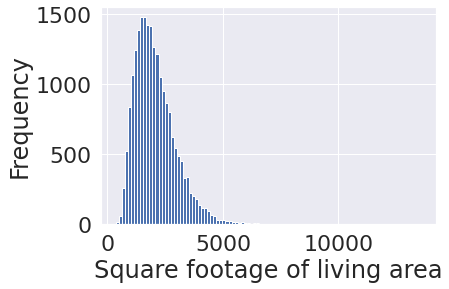

In [56]:
fig, ax = plt.subplots()
ax.set_xlabel('Square footage of living area')
ax.set_ylabel('Frequency')
ax.hist(kc_house_data['sqft_living'], bins=100);
# kc_house_data['sqft_living'].hist()

In [57]:
print("Skewness:", kc_house_data['sqft_living'].skew())
print("Kurtosis:", kc_house_data['sqft_living'].kurt())

Skewness: 1.473215455425834
Kurtosis: 5.252101950846816


In [58]:
kc_house_data['sqft_living'].describe()

count    21597.000000
mean      2080.321850
std        918.106125
min        370.000000
25%       1430.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

In [59]:
mean = kc_house_data['sqft_living'].mean()
mean

2080.3218502569803

In [60]:
std = kc_house_data['sqft_living'].std()
std

918.1061250800805

In [61]:
std_1 = mean + std
std_1m = mean - std
std_15 = mean + (1.5*std)
std_15m = mean - (1.5*std)

In [62]:
df = kc_house_data.loc[(kc_house_data['sqft_living']<std_15) & (kc_house_data['sqft_living']>std_15m)]

Skewness: 0.34744362219781993
Kurtosis: -0.7020749344943029


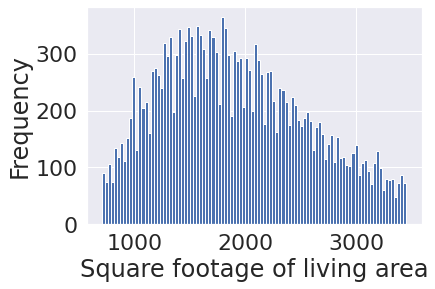

In [63]:
fig, ax = plt.subplots()
ax.set_xlabel('Square footage of living area')
ax.set_ylabel('Frequency')
ax.hist(df['sqft_living'], bins=100);
print("Skewness:", df['sqft_living'].skew())
print("Kurtosis:", df['sqft_living'].kurt())

In [64]:
kc_house_data['waterfront'].replace(to_replace=['NO', 'YES'], value=[0, 1], inplace=True)

In [70]:
kc_house_data['grade'].plot(kind='hist')

TypeError: no numeric data to plot

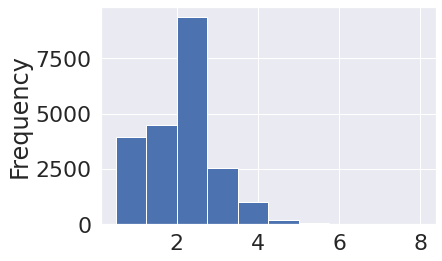

In [71]:
kc_house_data['bathrooms'].plot(kind='hist');

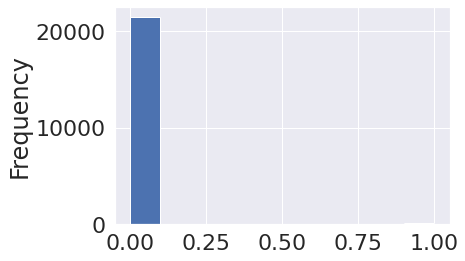

In [72]:
kc_house_data['waterfront'].plot(kind='hist');

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


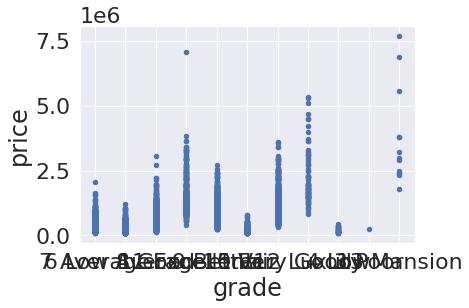

In [73]:
kc_house_data.plot(kind='scatter', x='grade', y='price');

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


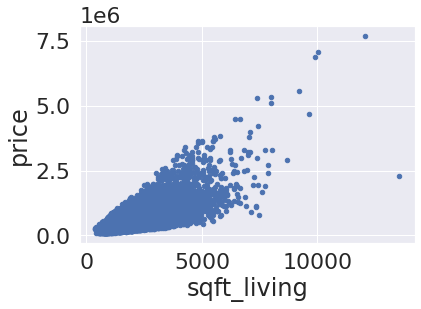

In [74]:
kc_house_data.plot(kind='scatter', x='sqft_living', y='price');

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


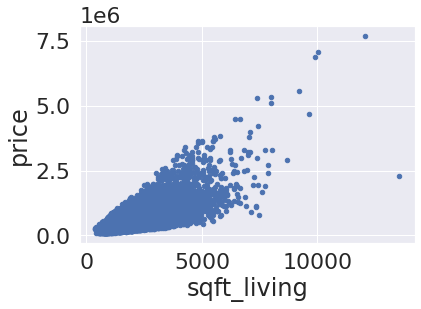

In [75]:
kc_house_data.plot.scatter(x='sqft_living', y='price');

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


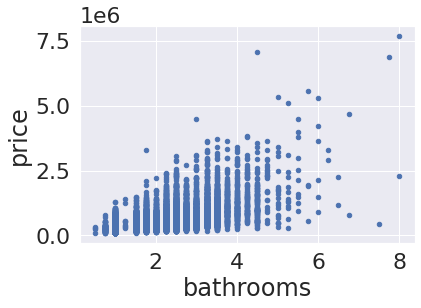

In [76]:
kc_house_data.plot(kind='scatter', x='bathrooms', y='price');

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


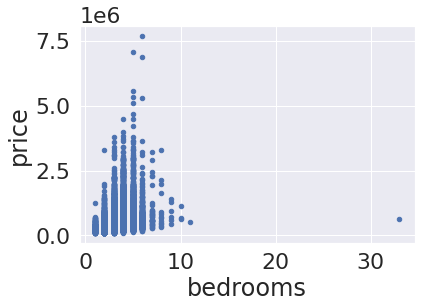

In [77]:
kc_house_data.plot(kind='scatter', x='bedrooms', y='price');

ValueError: num must be 1 <= num <= 20, not 21

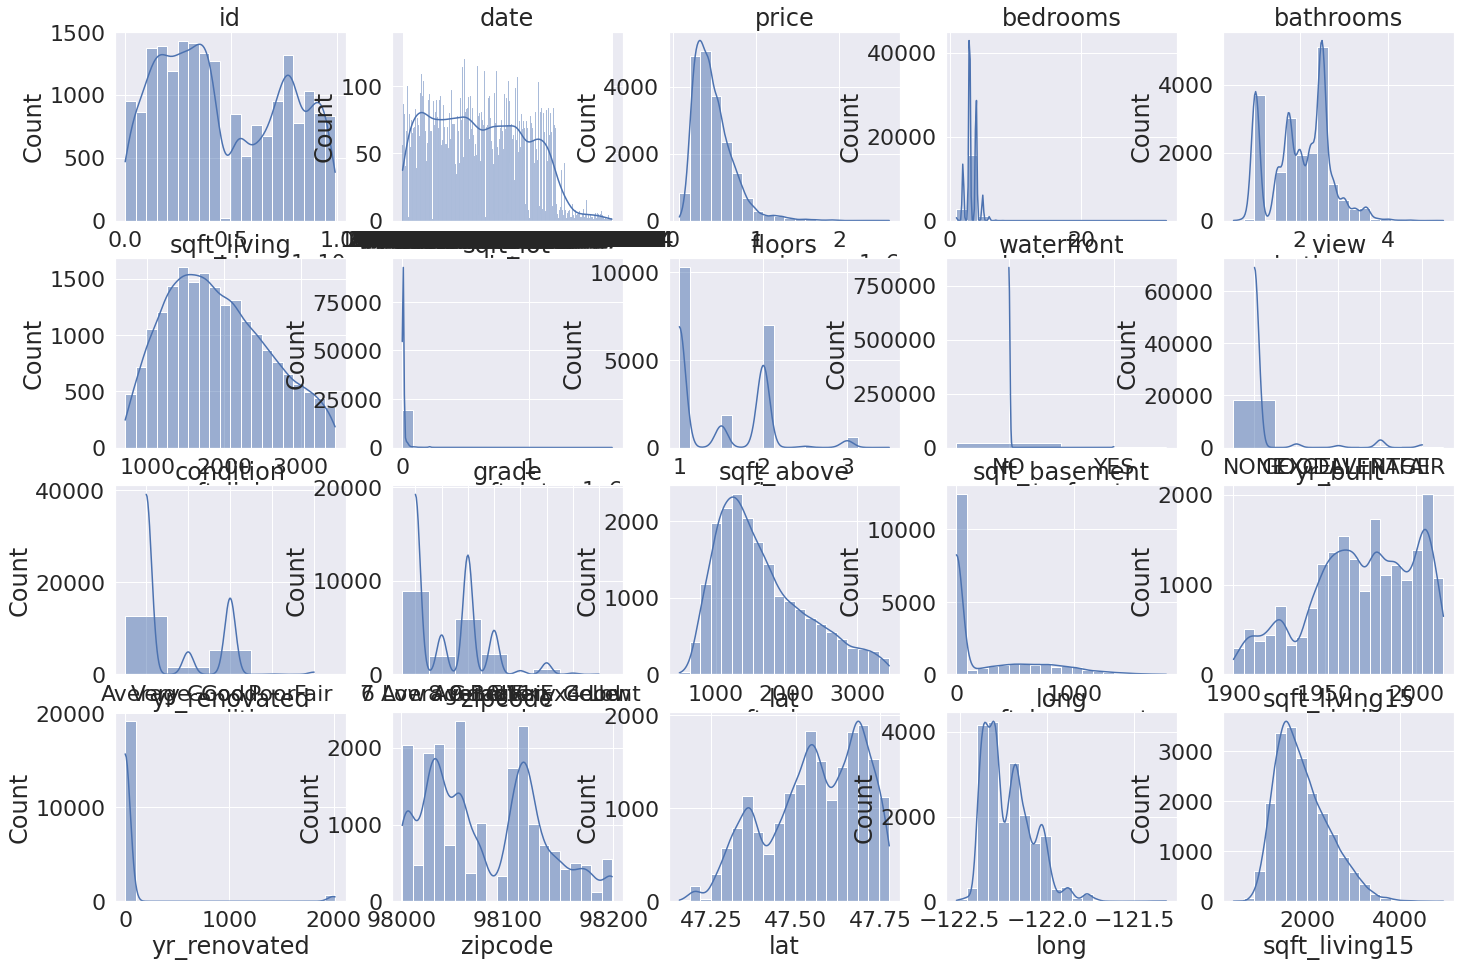

In [78]:
plt.figure(figsize=(24, 16))
for feature in kc_house_data.columns.to_list():
    plt.subplot(4, 5, df.columns.to_list().index(feature) + 1)
    sns.histplot(data=df[feature], bins=20, kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show();

In [79]:
kc_house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,NONE,...,7 Average,1180,0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,NONE,...,7 Average,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,NONE,...,6 Low Average,770,0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,NONE,...,7 Average,1050,910,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,NONE,...,8 Good,1680,0,1987,0.0,98074,47.6168,-122.045,1800,7503


## 4. Modelling

### Iteration 1 - Base model

We create a simple linear regression baseline model using two variables, **price**(target) and **square footage of the living space** in a home.

In [80]:
# define features and target
features = ['sqft_living']
target = ['price']

# separate dataframe into feature matrix x and target vector y
X = kc_house_data[features]
y = kc_house_data[target]

In [81]:
# Fit to the model
model = sm.OLS(endog=y, exog=sm.add_constant(X))
model

In [82]:
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Wed, 03 Jan 2024   Prob (F-statistic):               0.00
Time:                        13:38:10   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.399e+04   4410.023     -9.975      

#### Model Remarks

The model and coefficients are statistically significant with all p-values well below the standard alpha of *0.05*

The R-squared value is about **0.493**  i.e 49% of the variance in the target variable *price* can be explained by square foot living.

The intercept is about -4.399e+04 meaning that if we put 0 for square foot living we would expect the price to decrease by 43990

The square foot living coefficient is about **280.8630** Meaning that for each additional *1000* square footage added on the living space, the price would increase by **\\$280,863**

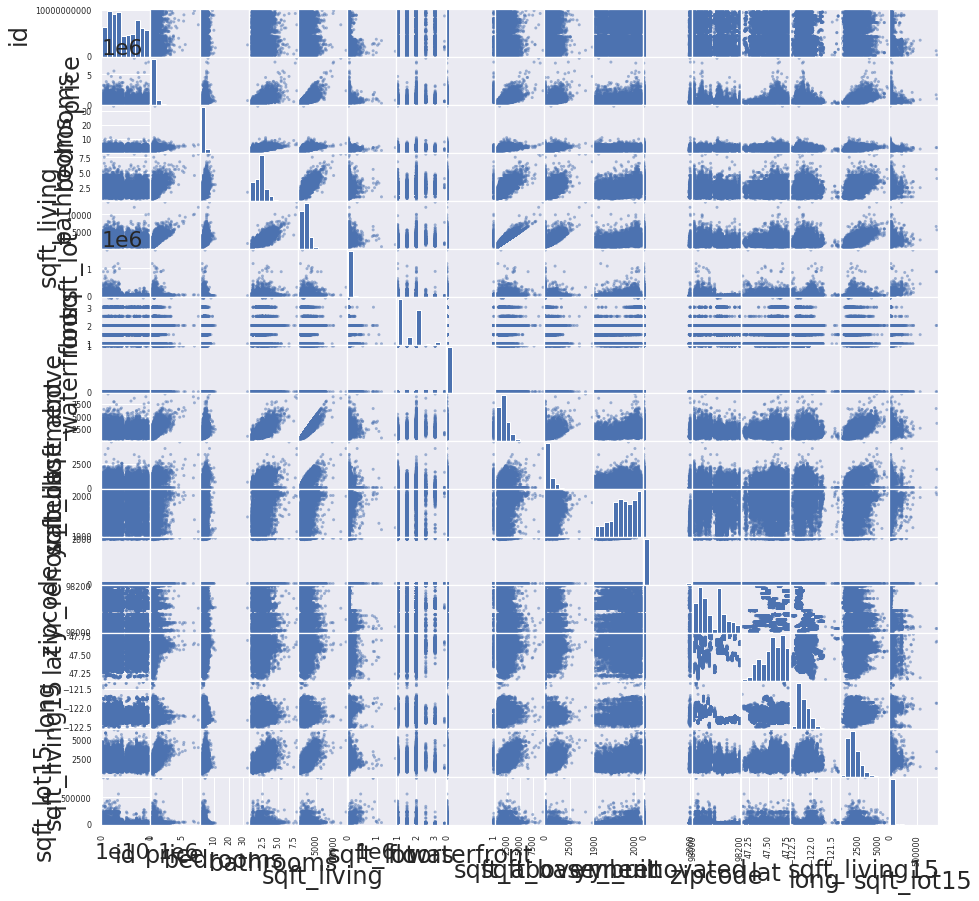

In [83]:
pd.plotting.scatter_matrix(kc_house_data, figsize=[15, 15]);
plt.show()

### Multiple Linear Regression

- Use more than 2 independent variables.
- One-hot encode categorical variables
- Check for multicollinearity

In [111]:
# Define features and the target variables
y = kc_house_data['price'] # Target
X = kc_house_data[['waterfront', 'grade', 'condition', 'sqft_living']] # Feature columns
X

,waterfront,grade,condition,sqft_living
0,0,7 Average,Average,1180
1,0,7 Average,Average,2570
2,0,6 Low Average,Average,770
3,0,7 Average,Very Good,1960
4,0,8 Good,Average,1680
...,...,...,...,...
21592,0,8 Good,Average,1530
21593,0,8 Good,Average,2310
21594,0,7 Average,Average,1020
21595,0,8 Good,Average,1600


In [112]:
X = pd.get_dummies(X, drop_first=True)
X

,waterfront,sqft_living,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better,condition_Fair,condition_Good,condition_Poor,condition_Very Good
0,0,1180,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,2570,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,770,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,1960,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,0,1680,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,0,1530,0,0,0,0,0,0,0,0,1,0,0,0,0,0
21593,0,2310,0,0,0,0,0,0,0,0,1,0,0,0,0,0
21594,0,1020,0,0,0,0,0,0,0,1,0,0,0,0,0,0
21595,0,1600,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [113]:
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     2257.
Date:                Wed, 03 Jan 2024   Prob (F-statistic):               0.00
Time:                        16:42:06   Log-Likelihood:            -2.9677e+05
No. Observations:               21597   AIC:                         5.936e+05
Df Residuals:                   21580   BIC:                         5.937e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5.255e+05   1

In [87]:
X.columns

Index(['waterfront', 'grade_11 Excellent', 'grade_12 Luxury',
       'grade_13 Mansion', 'grade_3 Poor', 'grade_4 Low', 'grade_5 Fair',
       'grade_6 Low Average', 'grade_7 Average', 'grade_8 Good',
       'grade_9 Better', 'condition_Fair', 'condition_Good', 'condition_Poor',
       'condition_Very Good'],
      dtype='object')

/home/andrew/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/graphics/regressionplots.py:561: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  fig.tight_layout()
<ipython-input-88-1e9c6b9ef800>:3: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  plt.tight_layout()


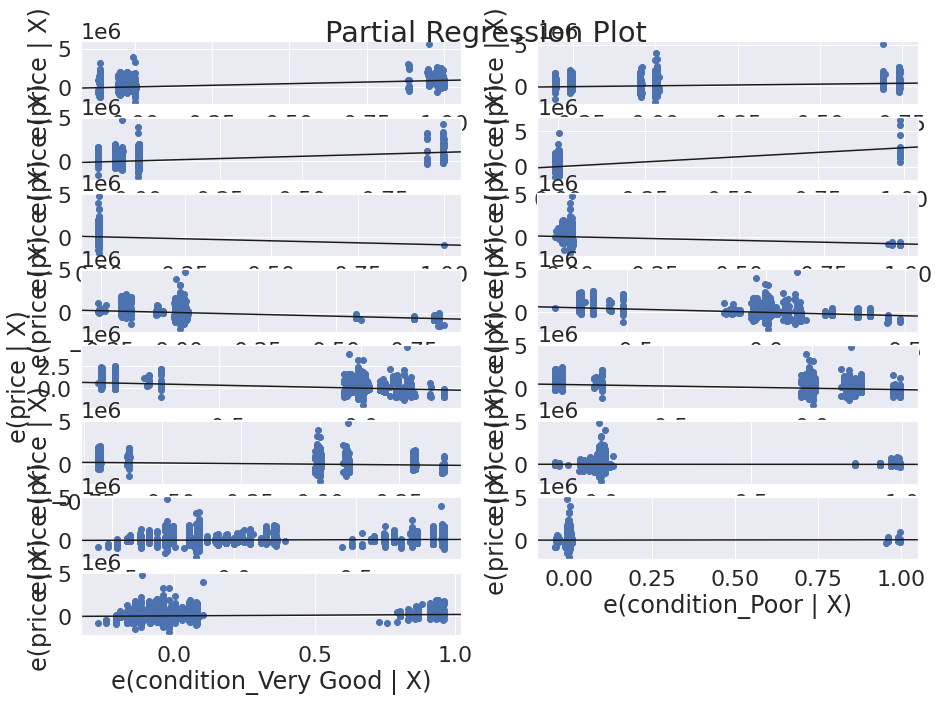

In [88]:
fig = plt.figure(figsize=(15, 10))
sm.graphics.plot_partregress_grid(results, exog_idx=list(X.columns), fig=fig)
plt.tight_layout()
plt.show();

#### Model remarks

In this case, R-squared is 0.573, indicating that the model explains 57.3% of the variance in the price.

The adjusted R-squared, 0.573 in this case, suggests that the inclusion of the predictors (waterfront, grade and condition) has improved the model fit.

The high F-statistic (1934) and associated low p-value (0.00) suggest that the overall model is statistically significant.

In terms of coefficients, For example, the coefficient for "waterfront_YES" is 8.464e+05, indicating the expected change in the dependent variable for a one-unit increase in this predictor, holding other variables constant.

For the t-stastistic, larger absolute values indicate more significant predictors. In this case, 

In [89]:
y = kc_house_data['price'] # Target
X = kc_house_data[['sqft_living', 'bathrooms', 'bedrooms']] # Features
X

,sqft_living,bathrooms,bedrooms
0,1180,1.00,3
1,2570,2.25,3
2,770,1.00,2
3,1960,3.00,4
4,1680,2.00,3
...,...,...,...
21592,1530,2.50,3
21593,2310,2.50,4
21594,1020,0.75,2
21595,1600,2.50,3


In [90]:
model = sm.OLS(y, sm.add_constant(X))
results= model.fit()

In [91]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     7401.
Date:                Wed, 03 Jan 2024   Prob (F-statistic):               0.00
Time:                        13:44:28   Log-Likelihood:            -2.9975e+05
No. Observations:               21597   AIC:                         5.995e+05
Df Residuals:                   21593   BIC:                         5.995e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        7.639e+04   6956.321     10.981      

#### Model Remarks

The model and coefficients are statistically significant with all p-values well below the standard alpha of *0.05*

The Adjusted R-squared value is about **0.507**  i.e 50.7% of the variance in the target variable *price* can be explained by square foot living, bathrooms and bedrooms.

The intercept is about 7.639e+04 meaning that if we put 0 for square foot living, bathroom and bedrooms we would expect the price to increase by 76390

The coefficient for sqft_living is 310.1848. This implies that, holding other variables constant, for every one-unit increase in square footage of living space (sqft_living), the estimated price (price) is expected to increase by 310.1848 units.

The coefficient for bathrooms is 7659.0953. This suggests that, holding other variables constant, for every additional bathroom (bathrooms), the estimated price (price) is expected to increase by 7659.0953 units. The p-value indicates that this variable is statistically significant at a 0.05 significance level

The coefficient for bedrooms is -5.857e+04. This implies that, holding other variables constant, for every additional bedroom (bedrooms), the estimated price (price) is expected to decrease by 5.857e+04 units. The negative sign indicates a negative relationship. The p-value is very low, suggesting that this variable is statistically significant

The model explains approximately 50.7% of the variance in house prices.
sqft_living has a strong positive relationship with price.
bathrooms has a positive relationship with price but is less significant.
bedrooms has a negative relationship with price and is statistically significant.



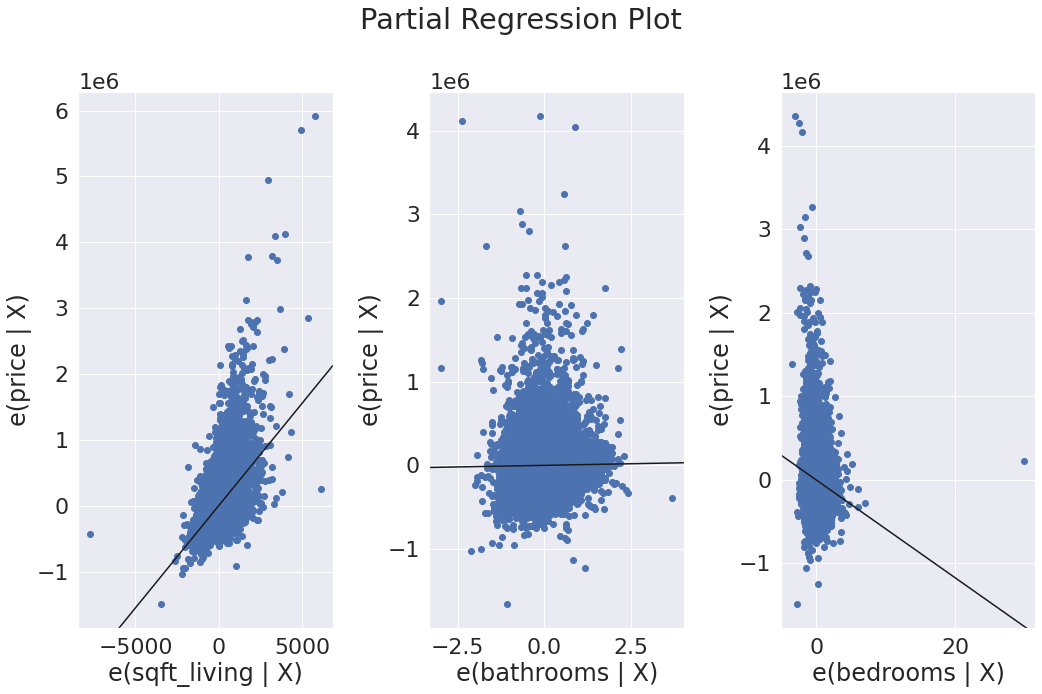

In [92]:
fig = plt.figure(figsize=(15, 10))
sm.graphics.plot_partregress_grid(results, exog_idx=list(X.columns), grid=(1,3), fig=fig)
plt.tight_layout()
plt.show();

In [93]:
formula = 'price ~ bedrooms + bathrooms + sqft_living + sqft_lot + floors + waterfront + view + condition + grade + sqft_above + sqft_basement + yr_built + yr_renovated'
#Included everything about the house, not the date or the neighborhood.
model = ols(formula=formula, data=kc_house_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     1652.
Date:                Wed, 03 Jan 2024   Prob (F-statistic):               0.00
Time:                        13:49:13   Log-Likelihood:            -2.9502e+05
No. Observations:               21597   AIC:                         5.901e+05
Df Residuals:                   21568   BIC:                         5.903e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               6.756e+06   1.35e+05     50.072      0.000    6.49e+06    7.02e+06
view[T.EXCELLENT]       1.951e+05   1.57e+04     12.392      0.000    1.64e+05    2.26e+05
view[T.FAIR]            6.503e+04   1.33e+04      4.907      0.000    3.91e+04     9.1e+04
view[T.GOOD]            5.434e+04   1.14e+04      4.753      0.000    3.19e+04    7.67e+04
view[T.NONE]           -5.377e+04   7050.159     -7.627      0.000   -6.76e+04      -4e+04
condition[T.Fair]      -2.583e+04   1.62e+04     -1.595      0.111   -5.76e+04    5907.609
condition[T.Good]       1.837e+04   3539.285      5.191      0.000    1.14e+04    2.53e+04
condition[T.Poor]      -3.749e+04   3.89e+04     -0.965      0.335   -1.14e+05    3.87e+04
condition[T.Very Good]  5.797e+04   5713.427     10.146      0.000    4.68e+04    6.92e+04
grade[T.11 Excellent]   2.729e+05   1.23e+04     22.146      0.000    2.49e+05    2.97e+05
grade[T.12 Luxury]      7.448e+05   2.35e+04     31.629      0.000    6.99e+05    7.91e+05
grade[T.13 Mansion]     1.938e+06   5.89e+04     32.887      0.000    1.82e+06    2.05e+06
grade[T.3 Poor]        -5.748e+05   2.08e+05     -2.768      0.006   -9.82e+05   -1.68e+05
grade[T.4 Low]         -5.443e+05   4.12e+04    -13.208      0.000   -6.25e+05   -4.64e+05
grade[T.5 Fair]        -5.541e+05   1.64e+04    -33.700      0.000   -5.86e+05   -5.22e+05
grade[T.6 Low Average] -5.028e+05   1.02e+04    -49.339      0.000   -5.23e+05   -4.83e+05
grade[T.7 Average]     -4.224e+05   8441.913    -50.032      0.000   -4.39e+05   -4.06e+05
grade[T.8 Good]        -3.323e+05   7731.228    -42.981      0.000   -3.47e+05   -3.17e+05
grade[T.9 Better]      -1.853e+05   7611.196    -24.342      0.000      -2e+05    -1.7e+05
bedrooms               -2.423e+04   1993.594    -12.155      0.000   -2.81e+04   -2.03e+04
bathrooms               4.711e+04   3379.571     13.941      0.000    4.05e+04    5.37e+04
sqft_living              110.9676     18.611      5.962      0.000      74.488     147.447
sqft_lot                  -0.2443      0.035     -6.938      0.000      -0.313      -0.175
floors                  4.103e+04   3647.692     11.247      0.000    3.39e+04    4.82e+04
waterfront              5.255e+05    2.1e+04     24.992      0.000    4.84e+05    5.67e+05
sqft_above                16.8366     18.581      0.906      0.365     -19.584      53.257
sqft_basement             43.9451     18.452      2.382      0.017       7.777      80.113
yr_built               -3145.2869     69.017    -45.573      0.000   -3280.566   -3010.008
yr_renovated              21.8333      4.106      5.317      0.000      13.785      29.882
==============================================================================
Omnibus:                    12481.692   Durbin-Watson:                   1.973
Prob(Omnibus)

In [94]:
# bathroom, bedroom, grade
y = kc_house_data['price']
X = kc_house_data[['bedrooms', 'grade', 'bathrooms']]
X

,bedrooms,grade,bathrooms
0,3,7 Average,1.00
1,3,7 Average,2.25
2,2,6 Low Average,1.00
3,4,7 Average,3.00
4,3,8 Good,2.00
...,...,...,...
21592,3,8 Good,2.50
21593,4,8 Good,2.50
21594,2,7 Average,0.75
21595,3,8 Good,2.50


In [95]:
X = pd.get_dummies(X, columns=['grade'], drop_first=True, dtype=int)
X

,bedrooms,bathrooms,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,3,1.00,0,0,0,0,0,0,0,1,0,0
1,3,2.25,0,0,0,0,0,0,0,1,0,0
2,2,1.00,0,0,0,0,0,0,1,0,0,0
3,4,3.00,0,0,0,0,0,0,0,1,0,0
4,3,2.00,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,0,0,0,0,0,0,0,0,1,0
21593,4,2.50,0,0,0,0,0,0,0,0,1,0
21594,2,0.75,0,0,0,0,0,0,0,1,0,0
21595,3,2.50,0,0,0,0,0,0,0,0,1,0


In [96]:
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     2085.
Date:                Wed, 03 Jan 2024   Prob (F-statistic):               0.00
Time:                        13:57:24   Log-Likelihood:            -2.9908e+05
No. Observations:               21597   AIC:                         5.982e+05
Df Residuals:                   21584   BIC:                         5.983e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  7.9e+05   1

In [ ]:
# Standardization, scaling etc.
# Check multicollinearity between features
#

In [98]:
predictors = kc_house_data.drop(columns=['price'])
predictors.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,3,1.00,1180,5650,1.0,0,NONE,Average,7 Average,1180,0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,3,2.25,2570,7242,2.0,0,NONE,Average,7 Average,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,2,1.00,770,10000,1.0,0,NONE,Average,6 Low Average,770,0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,4,3.00,1960,5000,1.0,0,NONE,Very Good,7 Average,1050,910,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,3,2.00,1680,8080,1.0,0,NONE,Average,8 Good,1680,0,1987,0.0,98074,47.6168,-122.045,1800,7503


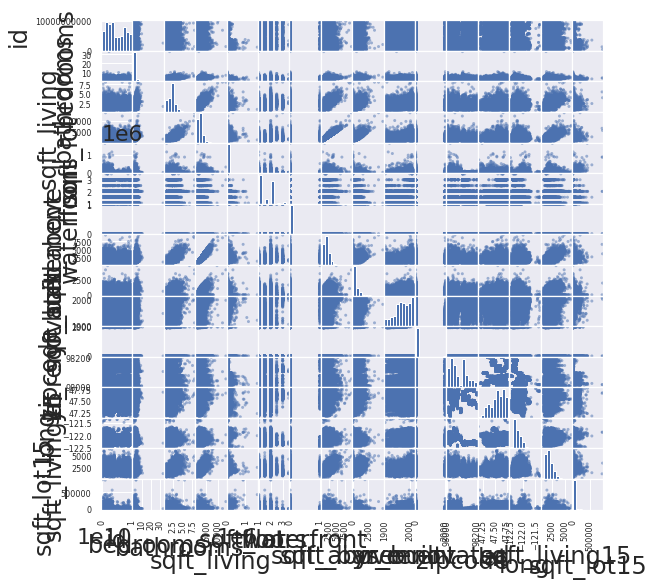

In [100]:
pd.plotting.scatter_matrix(predictors, figsize=[9, 9]);
plt.show()

In [101]:
predictors.corr()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.003599,-0.010799,-0.004359,0.021617,-0.010612,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
bedrooms,0.001150,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002127,0.479386,0.297229,0.155670,0.017900,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.514508,1.000000,0.755758,0.088373,0.502582,0.063629,0.686668,0.278485,0.507173,0.047177,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.578212,0.755758,1.000000,0.173453,0.353953,0.104637,0.876448,0.428660,0.318152,0.051060,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021459,0.184139,0.015031,0.052946,0.004979,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.177944,0.502582,0.353953,-0.004814,1.000000,0.020797,0.523989,-0.241866,0.489193,0.003793,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.003599,-0.002127,0.063629,0.104637,0.021459,0.020797,1.000000,0.071778,0.083050,-0.024487,0.073939,0.028923,-0.012157,-0.037628,0.083823,0.030658
sqft_above,-0.010799,0.479386,0.686668,0.876448,0.184139,0.523989,0.071778,1.000000,-0.051175,0.424037,0.020645,-0.261570,-0.001199,0.344842,0.731767,0.195077
sqft_basement,-0.004359,0.297229,0.278485,0.428660,0.015031,-0.241866,0.083050,-0.051175,1.000000,-0.130085,0.065008,0.073271,0.109853,-0.142369,0.199288,0.015885
yr_built,0.021617,0.155670,0.507173,0.318152,0.052946,0.489193,-0.024487,0.424037,-0.130085,1.000000,-0.202555,-0.347210,-0.148370,0.409993,0.326377,0.070777


In [103]:
abs(predictors.corr()) > 0.75

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,True,True,False,False,False,True,False,False,False,False,False,False,True,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
sqft_above,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False
sqft_basement,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
yr_built,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False


In [106]:
df = predictors.corr().abs().stack().reset_index().sort_values(0, ascending=False)
df['pairs'] = list(zip(df.level_0, df.level_1))
df.set_index(['pairs'], inplace=True)
df.drop(columns=['level_1', 'level_0'], inplace=True)
df.columns = ['cc']
df.drop_duplicates(inplace=True)

In [107]:
df[(df.cc > .75) & (df.cc < 1)]

,cc
pairs,
"(sqft_above, sqft_living)",0.876448
"(sqft_living, sqft_living15)",0.756402
"(sqft_living, bathrooms)",0.755758


In [109]:
kc_house_data.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.003599,-0.010799,-0.004359,0.021617,-0.010612,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.264306,0.605368,0.321108,0.053953,0.117855,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002127,0.479386,0.297229,0.155670,0.017900,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063629,0.686668,0.278485,0.507173,0.047177,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.104637,0.876448,0.428660,0.318152,0.051060,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021459,0.184139,0.015031,0.052946,0.004979,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.020797,0.523989,-0.241866,0.489193,0.003793,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.003599,0.264306,-0.002127,0.063629,0.104637,0.021459,0.020797,1.000000,0.071778,0.083050,-0.024487,0.073939,0.028923,-0.012157,-0.037628,0.083823,0.030658
sqft_above,-0.010799,0.605368,0.479386,0.686668,0.876448,0.184139,0.523989,0.071778,1.000000,-0.051175,0.424037,0.020645,-0.261570,-0.001199,0.344842,0.731767,0.195077
sqft_basement,-0.004359,0.321108,0.297229,0.278485,0.428660,0.015031,-0.241866,0.083050,-0.051175,1.000000,-0.130085,0.065008,0.073271,0.109853,-0.142369,0.199288,0.015885


<AxesSubplot:>

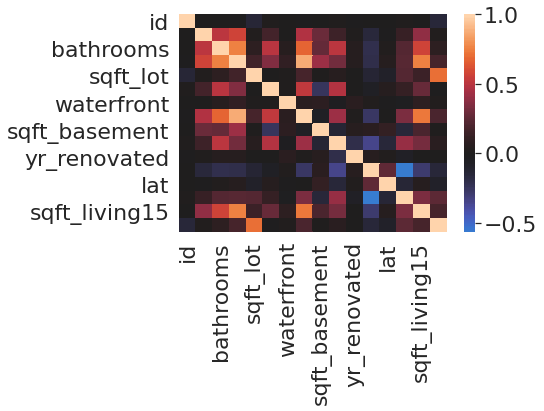

In [108]:
sns.heatmap(predictors.corr(), center=0)

In [114]:
formula = 'price ~ bedrooms + sqft_living + sqft_lot + floors + waterfront + view + condition + grade + sqft_basement + yr_built + yr_renovated'
#Included everything about the house, not the date or the neighborhood.
model = ols(formula=formula, data=kc_house_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     1756.
Date:                Wed, 03 Jan 2024   Prob (F-statistic):               0.00
Time:                        17:00:34   Log-Likelihood:            -2.9512e+05
No. Observations:               21597   AIC:                         5.903e+05
Df Residuals:                   21570   BIC:                         5.905e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               6.157e+06   1.28e+05     47.929      0.000     5.9e+06    6.41e+06
view[T.EXCELLENT]       1.934e+05   1.58e+04     12.233      0.000    1.62e+05    2.24e+05
view[T.FAIR]            6.468e+04   1.33e+04      4.859      0.000    3.86e+04    9.08e+04
view[T.GOOD]            5.518e+04   1.15e+04      4.805      0.000    3.27e+04    7.77e+04
view[T.NONE]           -5.526e+04   7075.564     -7.809      0.000   -6.91e+04   -4.14e+04
condition[T.Fair]      -2.619e+04   1.63e+04     -1.610      0.107   -5.81e+04    5692.636
condition[T.Good]       1.831e+04   3554.356      5.150      0.000    1.13e+04    2.53e+04
condition[T.Poor]      -3.727e+04    3.9e+04     -0.955      0.340   -1.14e+05    3.92e+04
condition[T.Very Good]  6.468e+04   5715.895     11.315      0.000    5.35e+04    7.59e+04
grade[T.11 Excellent]   2.777e+05   1.24e+04     22.439      0.000    2.53e+05    3.02e+05
grade[T.12 Luxury]      7.533e+05   2.36e+04     31.869      0.000    7.07e+05       8e+05
grade[T.13 Mansion]     1.959e+06   5.92e+04     33.106      0.000    1.84e+06    2.07e+06
grade[T.3 Poor]        -5.845e+05   2.09e+05     -2.803      0.005   -9.93e+05   -1.76e+05
grade[T.4 Low]         -5.519e+05   4.14e+04    -13.333      0.000   -6.33e+05   -4.71e+05
grade[T.5 Fair]        -5.622e+05   1.65e+04    -34.066      0.000   -5.95e+05    -5.3e+05
grade[T.6 Low Average] -5.133e+05   1.02e+04    -50.294      0.000   -5.33e+05   -4.93e+05
grade[T.7 Average]     -4.269e+05   8467.773    -50.416      0.000   -4.44e+05    -4.1e+05
grade[T.8 Good]        -3.324e+05   7759.669    -42.834      0.000   -3.48e+05   -3.17e+05
grade[T.9 Better]      -1.882e+05   7641.340    -24.627      0.000   -2.03e+05   -1.73e+05
bedrooms               -1.919e+04   1969.138     -9.743      0.000    -2.3e+04   -1.53e+04
sqft_living              144.1899      3.341     43.155      0.000     137.641     150.739
sqft_lot                  -0.2525      0.035     -7.143      0.000      -0.322      -0.183
floors                   5.47e+04   3517.604     15.551      0.000    4.78e+04    6.16e+04
waterfront              5.264e+05   2.11e+04     24.922      0.000    4.85e+05    5.68e+05
sqft_basement             36.7918      4.297      8.562      0.000      28.370      45.214
yr_built               -2826.4269     65.403    -43.216      0.000   -2954.621   -2698.232
yr_renovated              28.4585      4.097      6.947      0.000      20.429      36.488
==============================================================================
Omnibus:                    12460.978   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           455512.200
Skew:                           2.174   Prob(JB):                         0.00
Kurtosis:                      25.075

In [116]:
formula = 'price ~ + sqft_living + waterfront + view + condition + grade + sqft_basement'
#Included everything about the house, not the date or the neighborhood.
model = ols(formula=formula, data=kc_house_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     1848.
Date:                Wed, 03 Jan 2024   Prob (F-statistic):               0.00
Time:                        17:33:40   Log-Likelihood:            -2.9628e+05
No. Observations:               21597   AIC:                         5.926e+05
Df Residuals:                   21575   BIC:                         5.928e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               6.508e+05   1.36e+04     47.821      0.000    6.24e+05    6.78e+05
view[T.EXCELLENT]       1.996e+05   1.67e+04     11.973      0.000    1.67e+05    2.32e+05
view[T.FAIR]            6.334e+04    1.4e+04      4.512      0.000    3.58e+04    9.09e+04
view[T.GOOD]            5.714e+04   1.21e+04      4.721      0.000    3.34e+04    8.09e+04
view[T.NONE]           -8.759e+04   7422.241    -11.802      0.000   -1.02e+05    -7.3e+04
condition[T.Fair]      -3208.4724   1.71e+04     -0.188      0.851   -3.67e+04    3.03e+04
condition[T.Good]        4.42e+04   3549.553     12.452      0.000    3.72e+04    5.12e+04
condition[T.Poor]       2.473e+04   4.12e+04      0.601      0.548   -5.59e+04    1.05e+05
condition[T.Very Good]  1.211e+05   5769.789     20.993      0.000     1.1e+05    1.32e+05
grade[T.11 Excellent]   2.808e+05    1.3e+04     21.559      0.000    2.55e+05    3.06e+05
grade[T.12 Luxury]      7.632e+05   2.48e+04     30.743      0.000    7.15e+05    8.12e+05
grade[T.13 Mansion]     2.058e+06   6.22e+04     33.066      0.000    1.94e+06    2.18e+06
grade[T.3 Poor]        -4.853e+05    2.2e+05     -2.205      0.027   -9.17e+05    -5.4e+04
grade[T.4 Low]         -4.652e+05   4.36e+04    -10.671      0.000   -5.51e+05    -3.8e+05
grade[T.5 Fair]        -4.866e+05   1.72e+04    -28.332      0.000    -5.2e+05   -4.53e+05
grade[T.6 Low Average] -4.493e+05   1.04e+04    -43.026      0.000    -4.7e+05   -4.29e+05
grade[T.7 Average]     -4.109e+05   8725.342    -47.089      0.000   -4.28e+05   -3.94e+05
grade[T.8 Good]        -3.349e+05   8087.959    -41.409      0.000   -3.51e+05   -3.19e+05
grade[T.9 Better]      -1.945e+05   8021.757    -24.242      0.000    -2.1e+05   -1.79e+05
sqft_living              120.9998      2.940     41.155      0.000     115.237     126.763
waterfront              5.531e+05   2.23e+04     24.856      0.000    5.09e+05    5.97e+05
sqft_basement             48.4172      4.115     11.765      0.000      40.351      56.484
==============================================================================
Omnibus:                    12353.873   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           400729.762
Skew:                           2.184   Prob(JB):                         0.00
Kurtosis:                      23.645   Cond. No.                     3.38e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.38e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [117]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming df contains both numerical and categorical features
# Extracting categorical features
categorical_features = kc_house_data[['waterfront', 'condition', 'grade']]

# Convert categorical features to dummy variables
categorical_features = pd.get_dummies(categorical_features, drop_first=True)

# Combine dummy variables with numerical features
X = pd.concat([kc_house_data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors']], categorical_features], axis=1)


# Add a constant term
X = sm.add_constant(X)

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF values
print(vif_data)

               Variable        VIF
0                 const  75.148182
1              bedrooms   1.692976
2             bathrooms   2.976695
3           sqft_living   4.432537
4              sqft_lot   1.050477
5                floors   1.559420
6            waterfront   1.023996
7        condition_Fair   1.026185
8        condition_Good   1.146450
9        condition_Poor   1.016063
10  condition_Very Good   1.079435
11   grade_11 Excellent   1.376243
12      grade_12 Luxury   1.134918
13     grade_13 Mansion   1.045900
14         grade_3 Poor   1.002943
15          grade_4 Low   1.061249
16         grade_5 Fair   1.473034
17  grade_6 Low Average   4.256781
18      grade_7 Average   8.300158
19         grade_8 Good   5.837710
20       grade_9 Better   3.072810


In [126]:
kc_house_data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,interaction
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,NONE,...,1180,0,1955,0.0,98178,47.5112,-122.257,1340,5650,1180.0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,NONE,...,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639,5782.5
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,NONE,...,770,0,1933,0.0,98028,47.7379,-122.233,2720,8062,770.0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,NONE,...,1050,910,1965,0.0,98136,47.5208,-122.393,1360,5000,5880.0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,NONE,...,1680,0,1987,0.0,98074,47.6168,-122.045,1800,7503,3360.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0,NONE,...,1530,0,2009,0.0,98103,47.6993,-122.346,1530,1509,3825.0
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0,NONE,...,2310,0,2014,0.0,98146,47.5107,-122.362,1830,7200,5775.0
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0,NONE,...,1020,0,2009,0.0,98144,47.5944,-122.299,1020,2007,765.0
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0,NONE,...,1600,0,2004,0.0,98027,47.5345,-122.069,1410,1287,4000.0


In [128]:
# Interaction
X_sk = pd.get_dummies(kc_house_data, columns=['grade'], drop_first=True, dtype=int)
X_sk

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,NONE,...,0,0,0,0,0,0,0,1,0,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,NONE,...,0,0,0,0,0,0,0,1,0,0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,NONE,...,0,0,0,0,0,0,1,0,0,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,NONE,...,0,0,0,0,0,0,0,1,0,0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,NONE,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0,NONE,...,0,0,0,0,0,0,0,0,1,0
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0,NONE,...,0,0,0,0,0,0,0,0,1,0
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0,NONE,...,0,0,0,0,0,0,0,1,0,0
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0,NONE,...,0,0,0,0,0,0,0,0,1,0


In [129]:
X_sk.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'interaction', 'grade_11 Excellent',
       'grade_12 Luxury', 'grade_13 Mansion', 'grade_3 Poor', 'grade_4 Low',
       'grade_5 Fair', 'grade_6 Low Average', 'grade_7 Average',
       'grade_8 Good', 'grade_9 Better'],
      dtype='object')

In [134]:
# creating an interaction column for bathrooms and grade
# because there is multicollinearity
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Features before including interaction term
X_before = X_sk[['waterfront', 'grade_8 Good', 'sqft_living', 'bathrooms']]

# Create an interaction term between 'bathroom' and 'grade'
X_sk['interaction'] = X_sk['bathrooms'] * X_sk['grade_8 Good']

# Features after including interaction term
X_after = X_sk[['waterfront', 'grade_8 Good', 'sqft_living', 'interaction']]

# Perform train-test split
X_train_before, X_test_before, y_train, y_test = train_test_split(X_before, y, random_state=1)
X_train_after, X_test_after, _, _ = train_test_split(X_after, y, random_state=1)  # Use the same random_state
# Model without interaction term
lm_before = LinearRegression().fit(X_train_before, y_train)
lm_preds_before = lm_before.predict(X_test_before)

# Model with interaction term
lm_after = LinearRegression().fit(X_train_after, y_train)
lm_preds_after = lm_after.predict(X_test_after)

# Print R-squared values
print('R^2 before interaction term:', r2_score(y_test, lm_preds_before))
print('R^2 after interaction term:', r2_score(y_test, lm_preds_after))

R^2 before interaction term: 0.5397595000080344
R^2 after interaction term: 0.5435771991863103


In [ ]:
# Grade 7
# R^2 before interaction term: 0.5436319347080671
# R^2 after interaction term: 0.5581055788827662

In [ ]:
# Grade 6
# R^2 before interaction term: 0.5384979246081225
# R^2 after interaction term: 0.539436848261145

In [ ]:
# Grade 12
# R^2 before interaction term: 0.550357540414341
# R^2 after interaction term: 0.5421323296599521

In [ ]:
# Grade 8
# R^2 before interaction term: 0.5397595000080344
# R^2 after interaction term: 0.5435771991863103

In [124]:
kc_house_data['grade']

0            7 Average
1            7 Average
2        6 Low Average
3            7 Average
4               8 Good
             ...      
21592           8 Good
21593           8 Good
21594        7 Average
21595           8 Good
21596        7 Average
Name: grade, Length: 21597, dtype: object

### 5. Regression Results

### 6.Conclusion and Recommendation